# Red Neuronal 1
## Pablo Escobar
## Eduardo Ramírez

Dado el dataset de peliculas buscamos hacer lo siguiente:
Una red neuronal que reciba como input: El budget y el World Wide Gross
y como output nos diga:
El genero de la pelicula

In [449]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [450]:
# load data frame
df = pd.read_csv('movie_statistic_dataset.csv')
# columns to use
columnsToUse = ["Production budget $", "Worldwide gross $","runtime_minutes","movie_averageRating","genres"]
df = df[columnsToUse]

# convert numerical columns to float
for column in columnsToUse:
    if column != "genres":
        df[column]=df[column].astype(float)
# df= df.astype(float)

df.head()



,Production budget $,Worldwide gross $,runtime_minutes,movie_averageRating,genres
0,460000000.0,2.265936e+09,192.0,7.8,"Action,Adventure,Fantasy"
1,400000000.0,2.794732e+09,181.0,8.4,"Action,Adventure,Drama"
2,379000000.0,1.045714e+09,137.0,6.6,"Action,Adventure,Fantasy"
3,365000000.0,1.395317e+09,141.0,7.3,"Action,Adventure,Sci-Fi"
4,300000000.0,2.048360e+09,149.0,8.4,"Action,Adventure,Sci-Fi"


In [451]:
# Drop NAN
df = df.dropna()
df.head()


,Production budget $,Worldwide gross $,runtime_minutes,movie_averageRating,genres
0,460000000.0,2.265936e+09,192.0,7.8,"Action,Adventure,Fantasy"
1,400000000.0,2.794732e+09,181.0,8.4,"Action,Adventure,Drama"
2,379000000.0,1.045714e+09,137.0,6.6,"Action,Adventure,Fantasy"
3,365000000.0,1.395317e+09,141.0,7.3,"Action,Adventure,Sci-Fi"
4,300000000.0,2.048360e+09,149.0,8.4,"Action,Adventure,Sci-Fi"


In [452]:
# get list of genres
df['genres_list'] = df['genres'].str.split(',')

# Use the explode function to create a new DataFrame with one row per genre
genres_df = df.explode('genres_list')

# Get the unique genres from the new DataFrame
unique_genres = genres_df['genres_list'].unique()

# Print the unique genres
print(unique_genres)

['Action' 'Adventure' 'Fantasy' 'Drama' 'Sci-Fi' 'Thriller' 'Animation'
 'Comedy' 'Family' 'Crime' 'Mystery' 'Western' 'Romance' 'Musical'
 'Horror' 'History' 'Biography' 'Documentary' 'War' 'Sport' 'Music' '\\N'
 'Film-Noir' 'News']


In [453]:
for genre in unique_genres:
    df[genre] = df['genres_list'].apply(lambda x: 1 if genre in x else 0)

In [454]:
newColumns = ["Calification"]
for column in newColumns:
    df[column] = ["good" if score >= 6 else "bad" for score in df['movie_averageRating']]
df.head()

,Production budget $,Worldwide gross $,runtime_minutes,movie_averageRating,genres,genres_list,Action,Adventure,Fantasy,Drama,...,History,Biography,Documentary,War,Sport,Music,\N,Film-Noir,News,Calification
0,460000000.0,2.265936e+09,192.0,7.8,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]",1,1,1,0,...,0,0,0,0,0,0,0,0,0,good
1,400000000.0,2.794732e+09,181.0,8.4,"Action,Adventure,Drama","[Action, Adventure, Drama]",1,1,0,1,...,0,0,0,0,0,0,0,0,0,good
2,379000000.0,1.045714e+09,137.0,6.6,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]",1,1,1,0,...,0,0,0,0,0,0,0,0,0,good
3,365000000.0,1.395317e+09,141.0,7.3,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",1,1,0,0,...,0,0,0,0,0,0,0,0,0,good
4,300000000.0,2.048360e+09,149.0,8.4,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",1,1,0,0,...,0,0,0,0,0,0,0,0,0,good


In [455]:
# label -> one-hot encoding
label = pd.get_dummies(df['Calification'], prefix='label')
df = pd.concat([df, label], axis=1)
# drop old label
df.drop(['Calification'], axis=1, inplace=True)
df.drop(['movie_averageRating'], axis=1, inplace=True)

In [456]:
df

,Production budget $,Worldwide gross $,runtime_minutes,genres,genres_list,Action,Adventure,Fantasy,Drama,Sci-Fi,...,Biography,Documentary,War,Sport,Music,\N,Film-Noir,News,label_bad,label_good
0,460000000.0,2.265936e+09,192.0,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]",1,1,1,0,0,...,0,0,0,0,0,0,0,0,False,True
1,400000000.0,2.794732e+09,181.0,"Action,Adventure,Drama","[Action, Adventure, Drama]",1,1,0,1,0,...,0,0,0,0,0,0,0,0,False,True
2,379000000.0,1.045714e+09,137.0,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]",1,1,1,0,0,...,0,0,0,0,0,0,0,0,False,True
3,365000000.0,1.395317e+09,141.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",1,1,0,0,1,...,0,0,0,0,0,0,0,0,False,True
4,300000000.0,2.048360e+09,149.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",1,1,0,0,1,...,0,0,0,0,0,0,0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,65000.0,2.223381e+07,100.0,Documentary,[Documentary],0,0,0,0,0,...,0,1,0,0,0,0,0,0,False,True
4376,50000.0,1.042651e+07,98.0,"Comedy,Drama,Romance","[Comedy, Drama, Romance]",0,0,0,1,0,...,0,0,0,0,0,0,0,0,False,True
4377,50000.0,2.335352e+06,93.0,"Drama,Romance","[Drama, Romance]",0,0,0,1,0,...,0,0,0,0,0,0,0,0,True,False
4378,50000.0,4.241490e+05,98.0,"Comedy,Drama,Romance","[Comedy, Drama, Romance]",0,0,0,1,0,...,0,0,0,0,0,0,0,0,False,True


In [457]:
allX = ['Production budget $', 'Worldwide gross $','runtime_minutes']+list(unique_genres)
# Creating X and y
X = df[allX]
# Convert DataFrame into np array
X = np.asarray(X)
y = df[['label_bad',	'label_good']]
# Convert DataFrame into np array
y = np.asarray(y)

In [458]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20
)

In [459]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [460]:
inputSize = len(unique_genres)+3
batched_model = Sequential([
    Dense(64, input_shape=(inputSize,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='tanh'),
    BatchNormalization(),
    Dense(2, activation='softmax')
]);

In [461]:
batched_model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [462]:
batched_history =  batched_model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200


66/66 - 3s - loss: 0.6885 - accuracy: 0.6271 - val_loss: 0.5951 - val_accuracy: 0.7112 - 3s/epoch - 48ms/step
Epoch 2/200
66/66 - 0s - loss: 0.6063 - accuracy: 0.6941 - val_loss: 0.5896 - val_accuracy: 0.7135 - 489ms/epoch - 7ms/step
Epoch 3/200
66/66 - 1s - loss: 0.5954 - accuracy: 0.6944 - val_loss: 0.5770 - val_accuracy: 0.7043 - 597ms/epoch - 9ms/step
Epoch 4/200
66/66 - 1s - loss: 0.5873 - accuracy: 0.7032 - val_loss: 0.5840 - val_accuracy: 0.7043 - 729ms/epoch - 11ms/step
Epoch 5/200
66/66 - 1s - loss: 0.5912 - accuracy: 0.7085 - val_loss: 0.5877 - val_accuracy: 0.6975 - 604ms/epoch - 9ms/step
Epoch 6/200
66/66 - 0s - loss: 0.5842 - accuracy: 0.7085 - val_loss: 0.5825 - val_accuracy: 0.7009 - 429ms/epoch - 6ms/step
Epoch 7/200
66/66 - 0s - loss: 0.5813 - accuracy: 0.7043 - val_loss: 0.5915 - val_accuracy: 0.7009 - 445ms/epoch - 7ms/step
Epoch 8/200
66/66 - 0s - loss: 0.5771 - accuracy: 0.7123 - val_loss: 0.5792 - val_accuracy: 0.7066 - 423ms/epoch - 6ms/step
Epoch 9/200
66/66 - 0

In [463]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

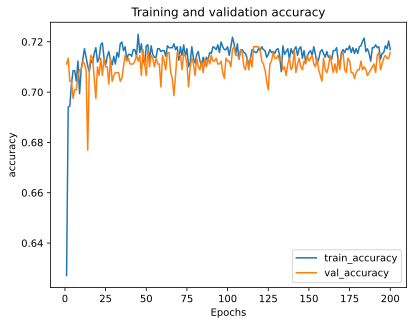

In [464]:
plot_metric(batched_history, 'accuracy')

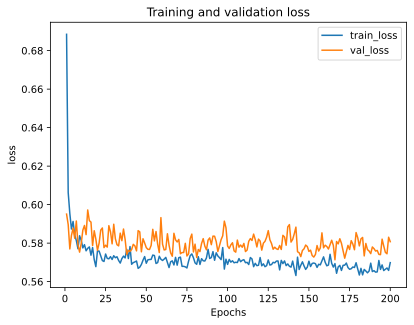

In [465]:
plot_metric(batched_history, 'loss')

In [466]:
batched_model.evaluate(X_test, y_test, verbose=2)

28/28 - 0s - loss: 0.5935 - accuracy: 0.7032 - 63ms/epoch - 2ms/step


[0.5935357213020325, 0.7031963467597961]